In [2]:
## Bernoulli random variable

In [4]:
from Utils import makeEMF, plotEMF

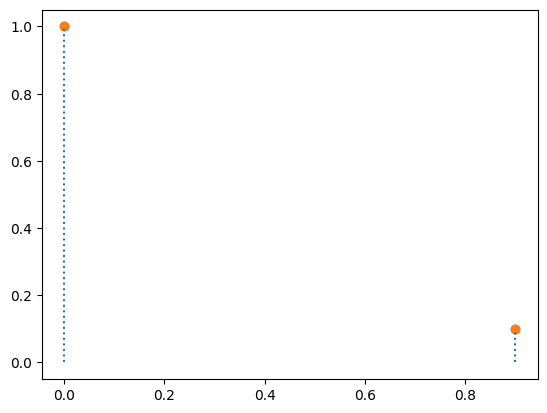

In [ ]:
p=0.1
plotEMF([((0,(1-p)),(1, p))])

In [7]:
from Utils import plotEDF, emfToEdf, makeEDF

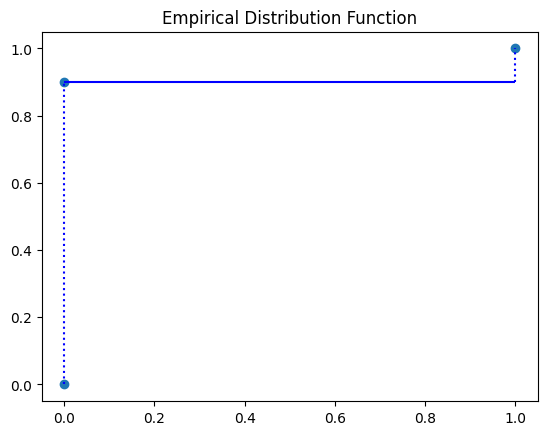

In [8]:
plotEDF(emfToEdf([(0,0), (0, 1-p), (1, p)]))

In [9]:
## Binomial random variable

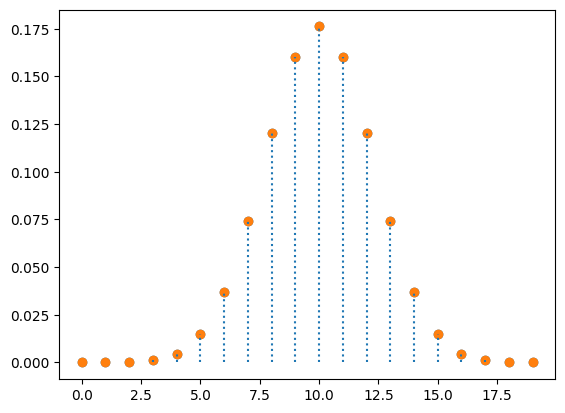

In [10]:
from scipy.special import binom as binomial
n=20
p=0.5
plotEMF([(i, binomial(n,i)* (p**i)* ((1-p)**(n-i))) for i in range(n)])

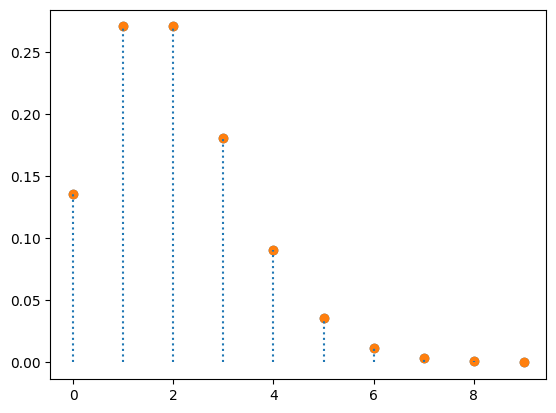

In [12]:
from scipy.special import factorial
from math import exp
l=2
plotEMF([(i, (l**i)* (exp(-l)/factorial(i))) for i in range(10)])

In [13]:
import numpy as np
np.random.poisson(2, 10)

array([1, 1, 2, 5, 3, 0, 3, 2, 1, 0])

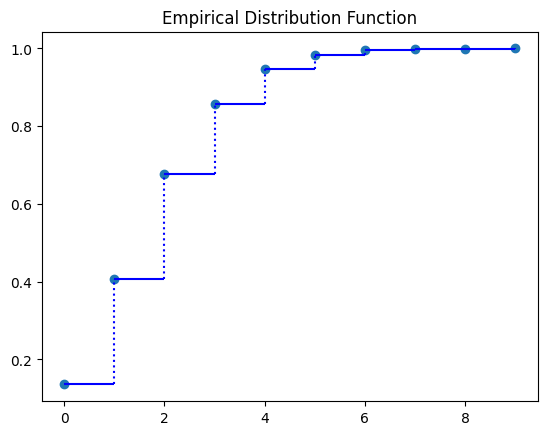

In [14]:
plotEDF(emfToEdf([(i, (l**i)* (exp(-l)/factorial(i))) for i in range(10)]))

In [ ]:
from random import randint

def X():
    return randint(0,2)
def emphirical_mean(n):
    z= sum(X() for i in range(n))
    return z/n

In [25]:
emphirical_mean(10)

1.3

In [34]:
x= np.random.uniform(0,1, 100)
x

array([0.78511555, 0.61516458, 0.23322975, 0.14884894, 0.16611199,
       0.58119312, 0.23596532, 0.37026828, 0.68691491, 0.69039598,
       0.48775309, 0.43461421, 0.319957  , 0.91239031, 0.17266042,
       0.89196693, 0.18449069, 0.92154632, 0.00327349, 0.95114934,
       0.25992696, 0.14965646, 0.48896126, 0.71199002, 0.99345434,
       0.15607008, 0.76695525, 0.05338617, 0.60944329, 0.15055579,
       0.44036749, 0.75208568, 0.02252913, 0.13719528, 0.13209786,
       0.56348825, 0.44085494, 0.99327335, 0.45166545, 0.46497054,
       0.01741019, 0.3532475 , 0.48457817, 0.11715073, 0.52577931,
       0.08036467, 0.38497361, 0.61320995, 0.46253077, 0.86029057,
       0.90900456, 0.46611684, 0.12495041, 0.83134959, 0.29164398,
       0.94235389, 0.71293344, 0.64188204, 0.91500081, 0.05498669,
       0.19195942, 0.8764377 , 0.09140891, 0.75098432, 0.84229425,
       0.31569813, 0.59902798, 0.02577658, 0.31083423, 0.97110538,
       0.25814995, 0.79397546, 0.03975344, 0.08817244, 0.24308

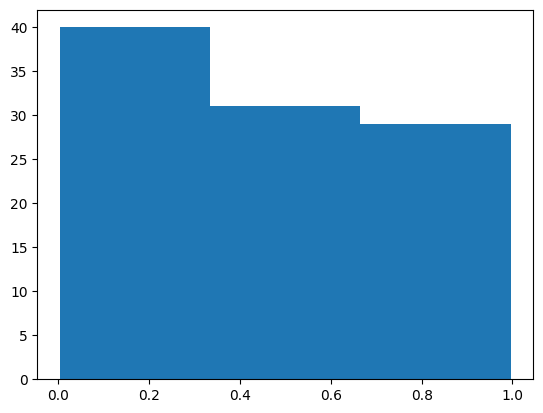

In [35]:
import matplotlib.pyplot as plt
_=plt.hist(x, bins= 3)

In [37]:
np.random.normal(size=10)

array([-0.64265014,  1.18982692, -0.64130834,  1.11873605,  0.37371162,
        0.06000784,  0.23521564,  0.58663327, -0.58226212,  0.48256541])

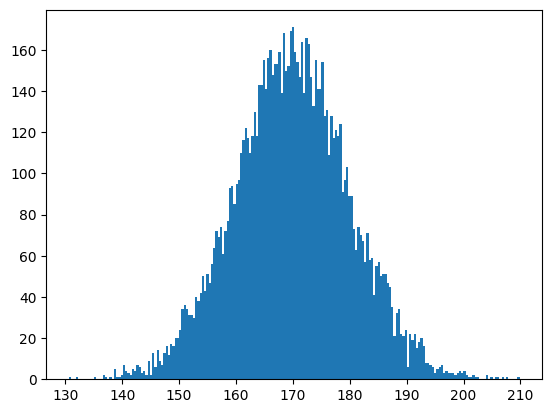

In [46]:
_=plt.hist(np.random.normal(170, 10, size=10000), bins= 200)

In [52]:
def load_sms():
    import csv
    lines= []
    hamspam= {'ham': 0, 'spam': 1}
    with open ('D:/Uppsala Materials/data/spam.csv', mode= 'r', encoding='latin-1') as f:
        readers = csv.reader(f)
        header= next(readers)
        lines= [(line[1], hamspam[line[0]]) for line in readers] 
    return lines
    

In [53]:
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

In [93]:
def freeandprize(txt):
    if 'free' in txt or 'prize' in txt:
        return 1
    return 0


        

In [95]:
freeandprize('samin is not free and getting prize')

1

In [96]:
freeandprizeindataset = sum(freeandprize(txt.lower()) for txt, labels in sms_data)
freeandprizeindataset

345

In [97]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [98]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [ ]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]


[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [102]:
number = []  

for txt,labels in sms_data:
    txt= txt.lower()
    if freeandprize(txt) == 1:
        number.append(1)
    else:
        number.append(0)

print(number[:10])  

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [121]:
import numpy as np
def fx12(x):
    tf= {True: 1, False: 0}
    return np.mean([tf[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])

In [122]:
fx12([1,1])

1.0

In [123]:
print("\tz <= 0 \t\tz <= 1")
for y in range(0,2):
    print('y=', y)
    for z in range(0,2):
        print("%.2f" % (fx12((y,z))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y= 0
0.86		0.87		

y= 1
0.96		1.00		



In [137]:
fx12((0,0))== fx12((0,1))*fx12((1,0))

False

0.8659368269921034

In [124]:
fx12([1,0])

0.9551328068916008

In [133]:
makeEDF(Y_obs)

array([[0.        , 0.86593683],
       [1.        , 1.        ]])

In [147]:
# Assuming X_1_obs is your list/array of observations for X1
val_of_interest = 1
count = sum(1 for x in  Y_obs if x == val_of_interest)
marginal_prob = count / len(Y_obs)

print(f"P(Z = {val_of_interest}) is {marginal_prob}")

P(Z = 1) is 0.13406317300789664


In [145]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

In [144]:
toprow= np.mean([x1==1 and x2==1 for x1,x2 in zip(Y_obs, Z_obs)])
bottomrow = marginal_prob
proba= toprow/bottomrow
proba

0.8119999999999999

In [146]:
np.mean(Y_obs)

0.13406317300789664

In [148]:
x = np.random.normal(size=100)

In [149]:
np.mean(x)

0.02001634898031392

In [150]:
np.var(x)

1.0517917880695828

In [151]:
from scipy.stats import skew, kurtosis

In [152]:
skew(x)

0.26118639220162937

In [153]:
kurtosis(x,fisher=False)

2.8847273534734525

In [154]:
def standarize(data):
    mean= np.mean(data)
    std= np.sqrt(np.var(x))
    return (data-mean)/std

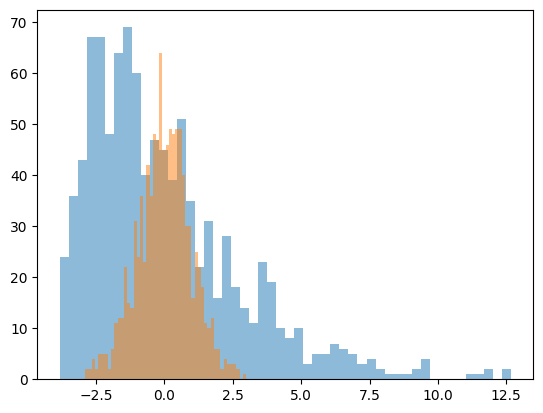

In [156]:
chi2= np.random.chisquare(4, size= 1000)
nor= np.random.normal(size= 1000)
_=plt.hist(standarize(chi2),bins=50,alpha=0.5)
_=plt.hist(standarize(nor),bins=50,alpha=0.5)